In [5]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [7]:
df.shape

(11251, 15)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
# DROP UNRELATED BLANK COLUMNS 
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# DROP NULL COLUMNS
df.dropna(inplace=True)

In [13]:
# CHANGE DATETYPE
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [43]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [ ]:
# EDA PART

In [ ]:
# GENDER DETAILS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


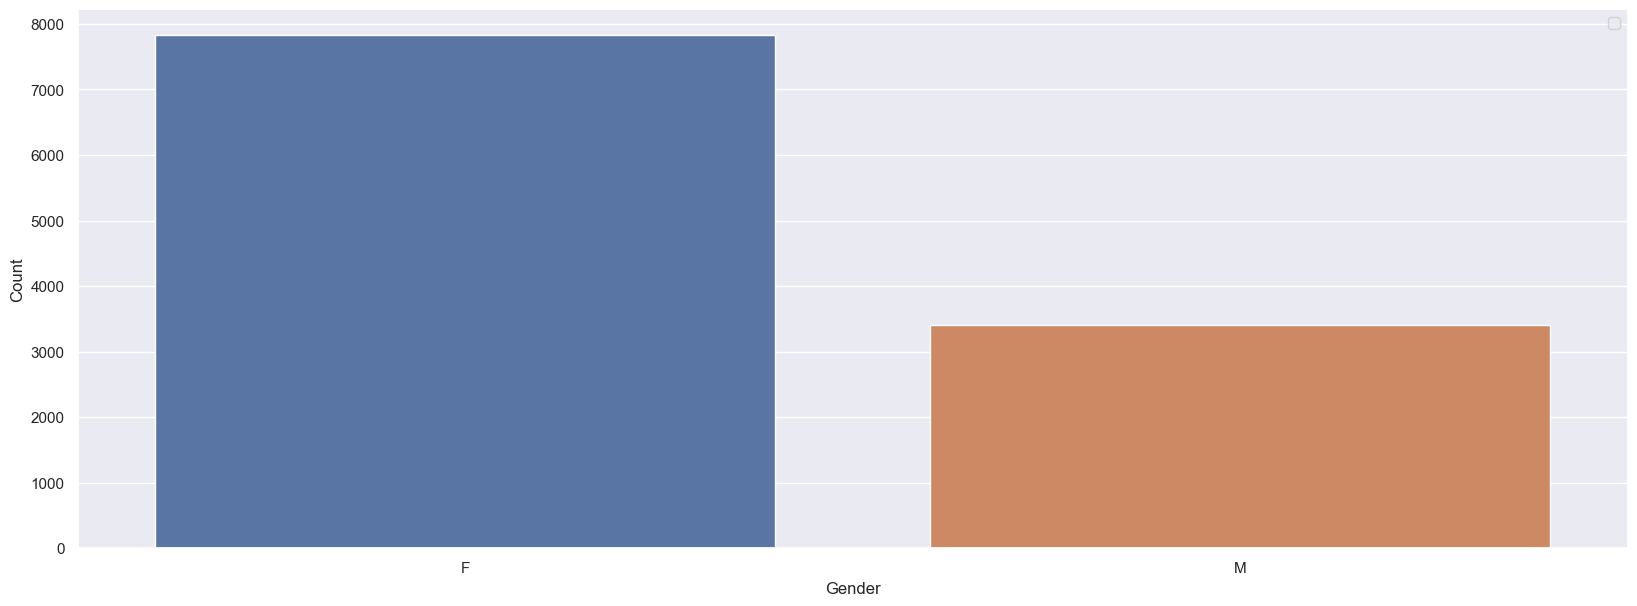

<Figure size 1600x800 with 0 Axes>

In [44]:
ax =sns.countplot(x='Gender',data= df)
plt.xlabel('Gender')
plt.ylabel('Count')
ax.legend(bbox_to_anchor=(1,1))
plt.figure(figsize=(16,8))
plt.show()

Text(0.5, 1.0, 'Gender wise Sales Details')

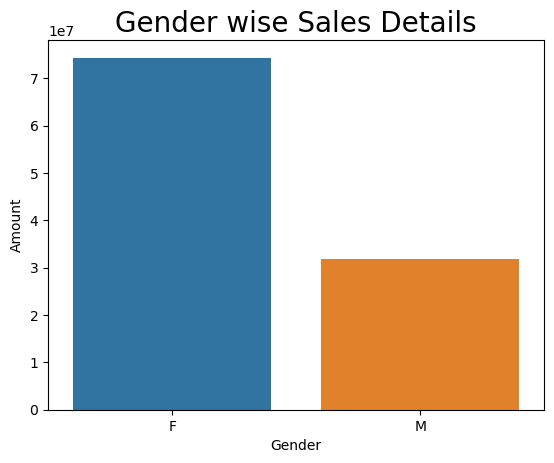

In [19]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Gender',y='Amount',data= sales_gen).set_title('Gender wise Sales Details',fontsize=(20))

In [20]:
'''So from  above Graphs we can see that most of the buyers are female  and even the purchasing power of females are greater 
than men '''

'So from  above Graphs we can see that most of the buyers are female  and even the purchasing power of females are greater \nthan men '

In [ ]:
# AGE GROUP

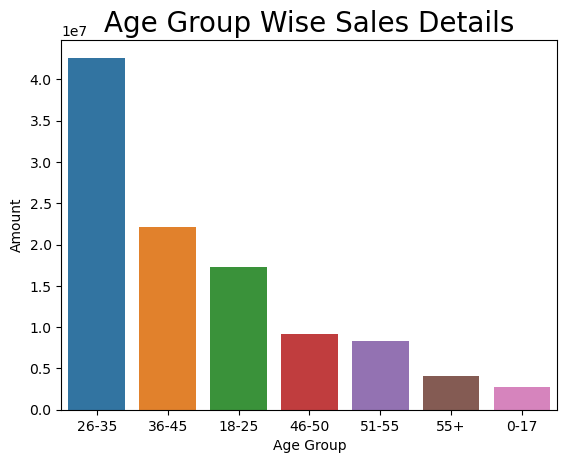

In [21]:
# TOTAL AMOUNT VS AGE GROUP
sale_age = df.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending =False)
ax1 = sns.barplot(x='Age Group',y='Amount',data = sale_age).set_title('Age Group Wise Sales Details',fontsize=(20))

Text(0.5, 1.0, 'TOP 10 States By Orders')

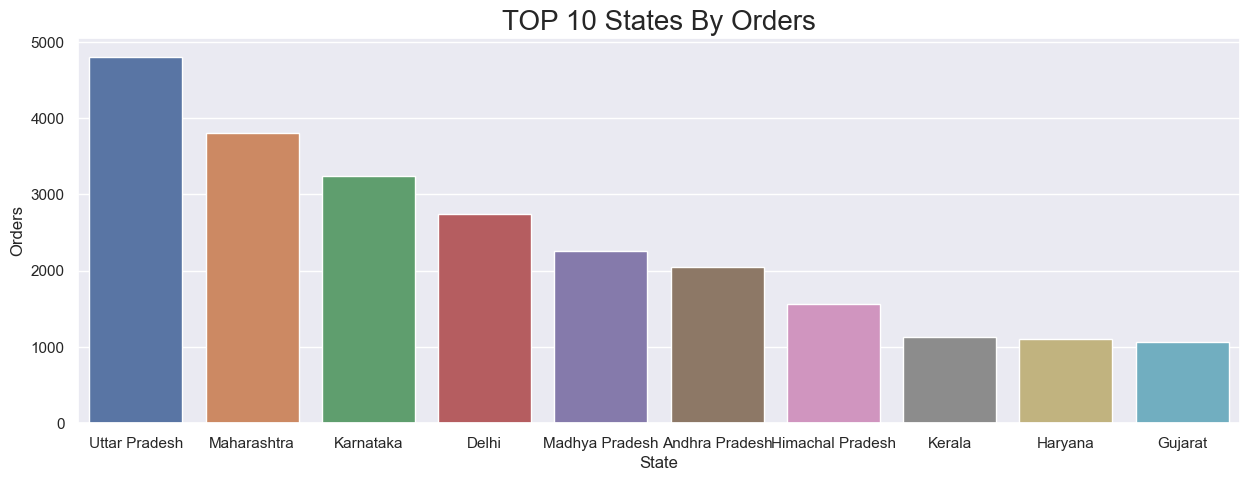

In [22]:
## # TOTAL NUMBER OF ORDERS FROM 10 STATES
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders').set_title('TOP 10 States By Orders',fontsize=(20))

Text(0.5, 1.0, 'Top 10 State by Oders')

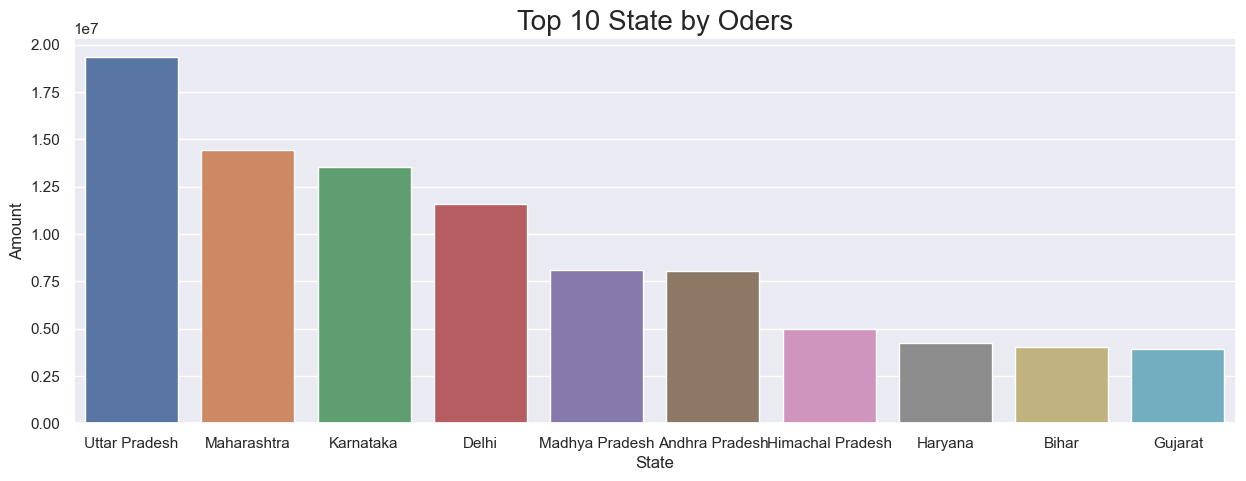

In [23]:
# TOTAL AMOUNT/SALES FROM 10 STATES
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount').set_title('Top 10 State by Oders',fontsize=(20))

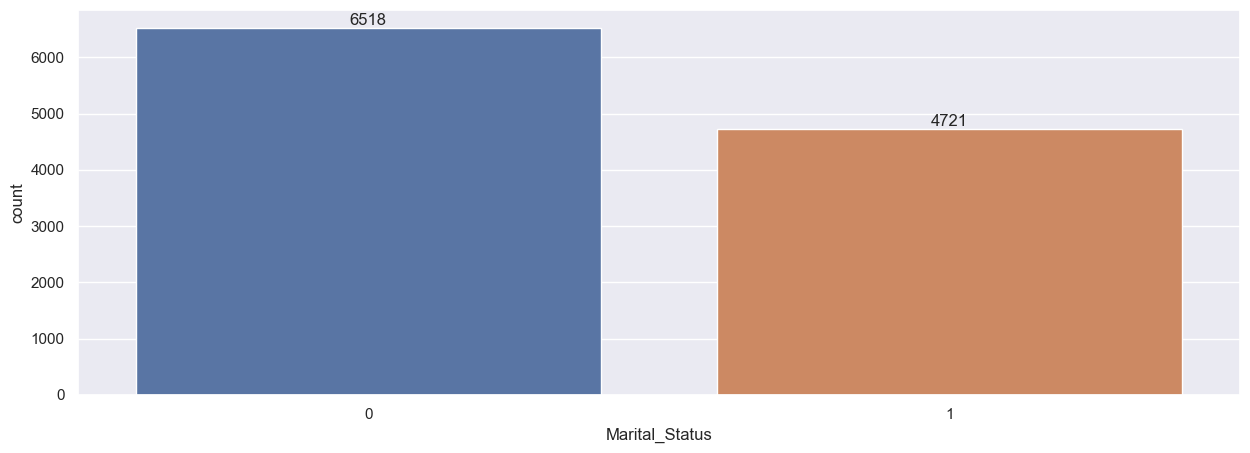

In [24]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

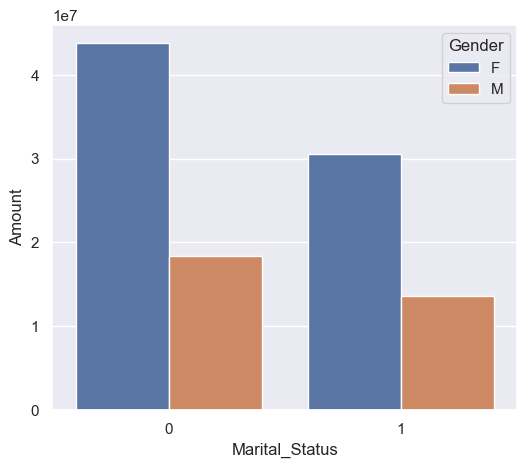

In [25]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

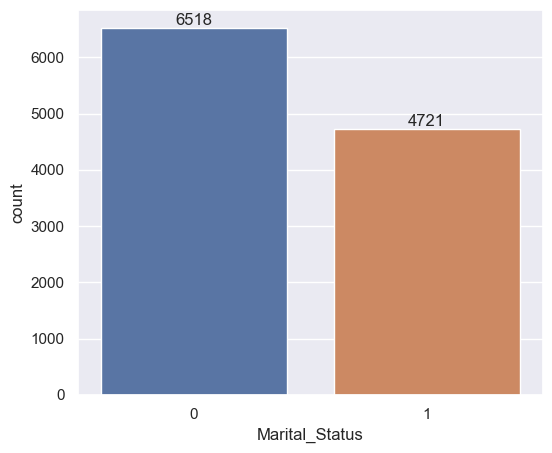

In [26]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(6,15)})
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
''' FROM ABOVE WE CAN SEE THAT MOST OF THE BUYER ARE SINGLE WOMEN

Text(0.5, 1.0, 'Top 10 State by Oders')

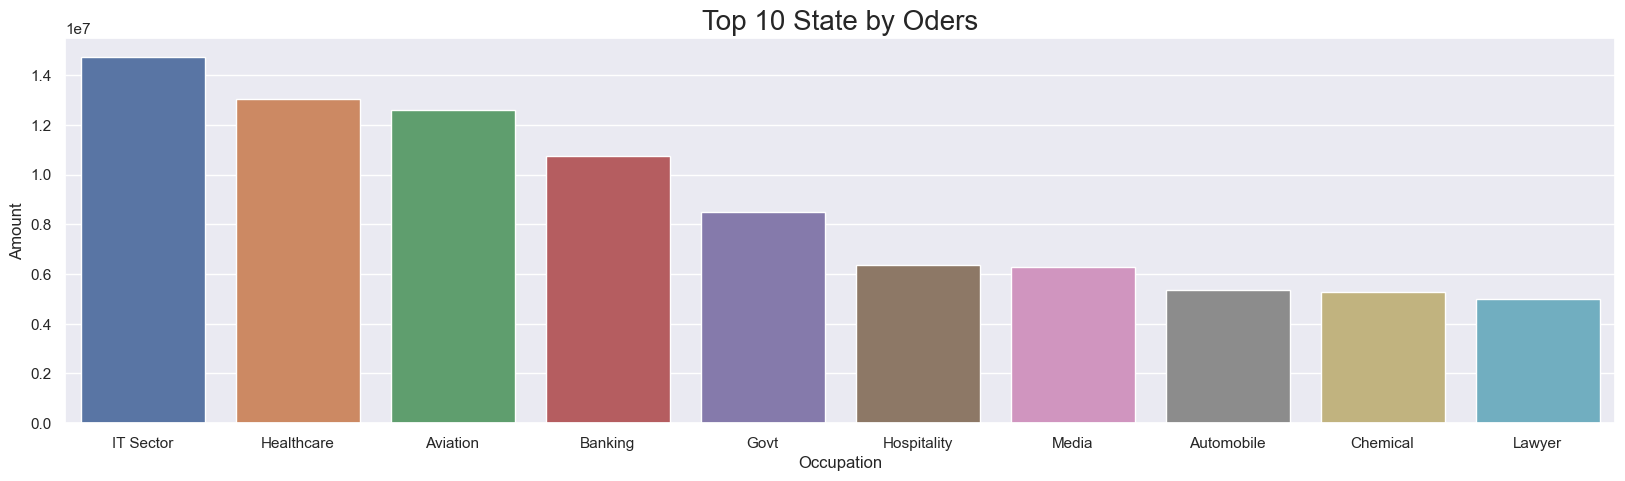

In [28]:
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_occ, x = 'Occupation',y= 'Amount').set_title('Occupation Sales details',fontsize=(20))

In [ ]:
''' FROM ABOVE GRAPHS WE CAN SEE THAT MOST OF THE BUYERS ARE WORKING IN IT, HEALTHCARE AND AVIATION'''

Text(0.5, 1.0, 'TOP 10 FOOD BY SALE WISE')

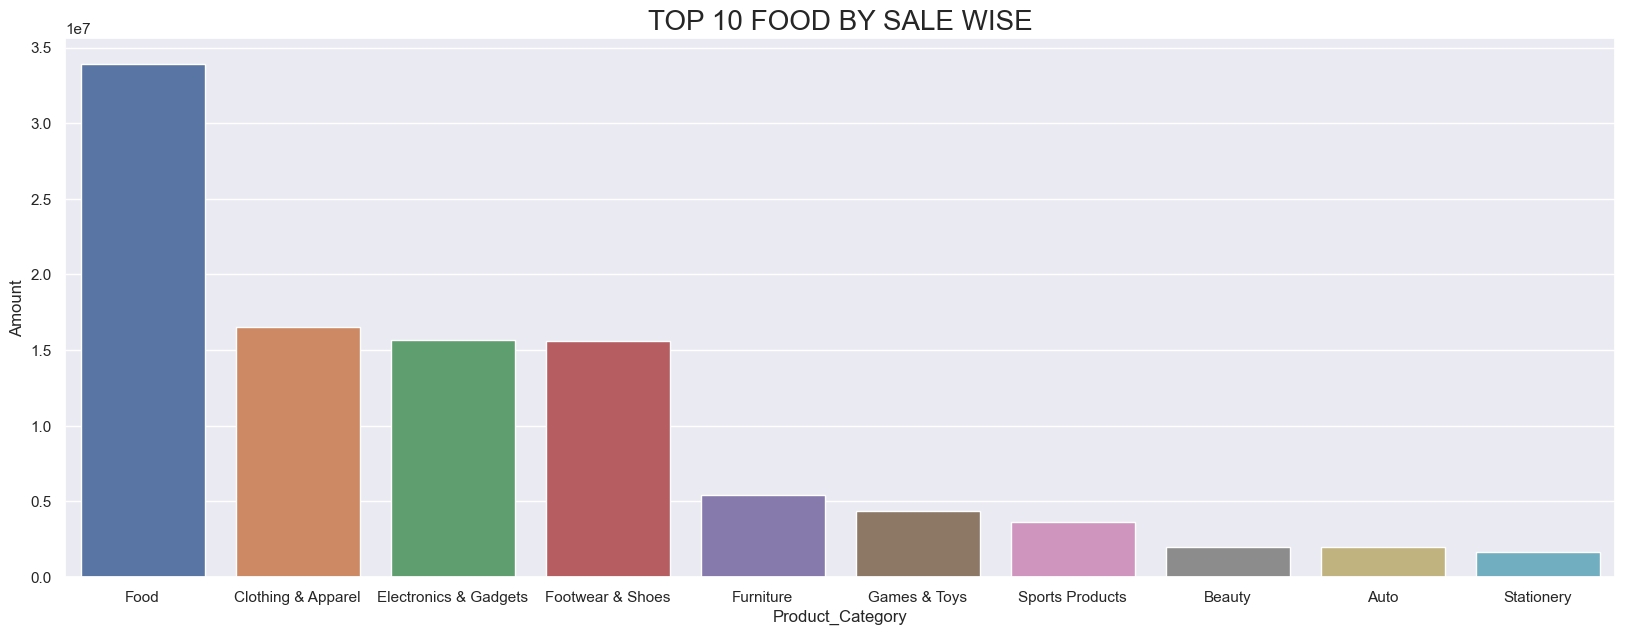

In [42]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_product, x = 'Product_Category',y='Amount' ).set_title('TOP 10 FOOD BY SALE WISE',fontsize=(20))

In [ ]:
''' FROM ABOVE GRAPH WE CAN SEE THAT THE MOSTOF THE SOLD PRODUCTS ARE FROM FOOD ,CLOTHING , ELECTRONIC AND FOOTWARE'''

Text(0.5, 1.0, 'PRODUCT_ID WISE ORDERS DETAILS')

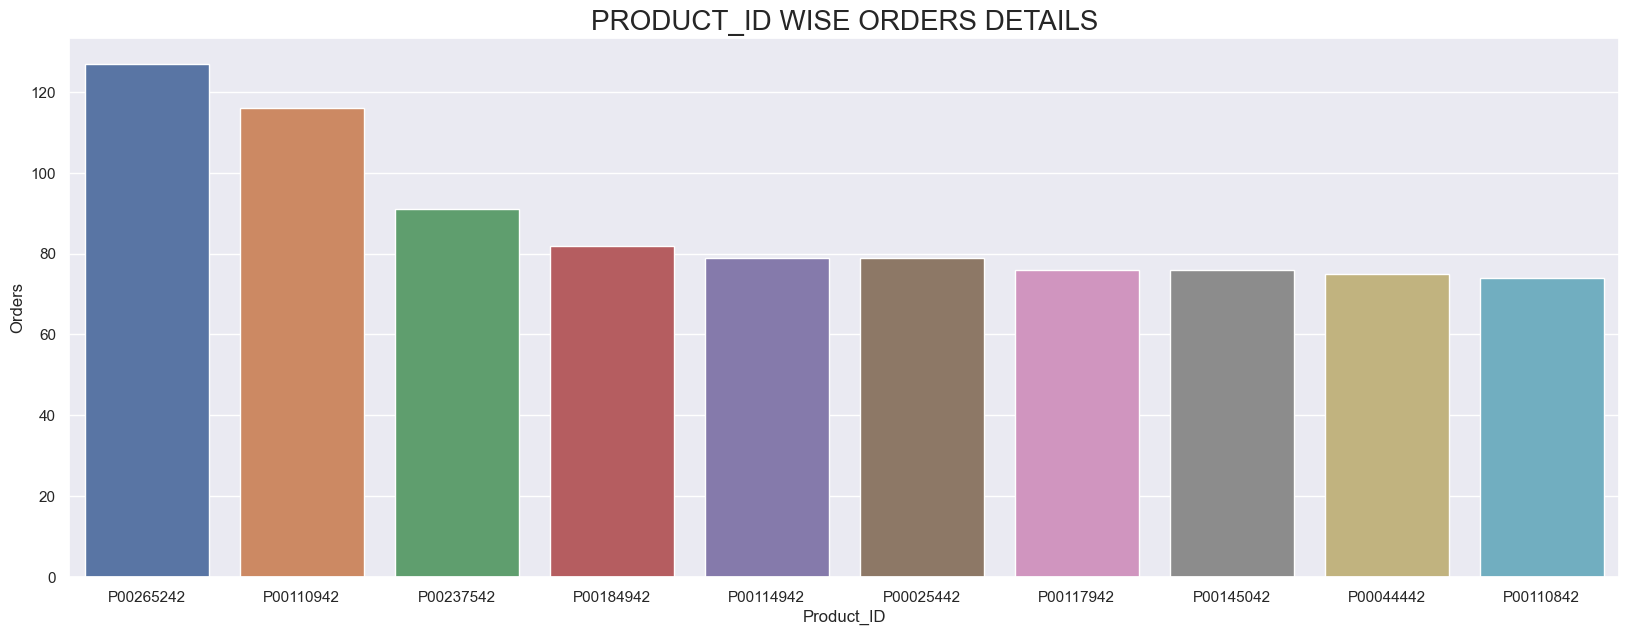

In [41]:
sales_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_product, x = 'Product_ID',y='Orders' ).set_title('PRODUCT_ID WISE ORDERS DETAILS',fontsize=(20))

In [ ]:
'''' Conclusion
 WOMEN OF BETWEEN 26-35 AGE GROUP FROM UP, MAHARASHTRA AND KARNATAK IN IT, AVIATION AND HEALTHCARE ARE MORE LIKELY TO BUY

  PRODUCTS OF FOODS, CLOTHING AND ELECTRONIC

 '''